Pearson correlation plot of raw and syn data doesn't have any visable difference. This metric is too rough to use useful.

In [2]:
import utils.data as data
import utils.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import os 

In [17]:
def pcorr_vis(dataset, filename, time_unit_exp=1, 
    flow_tuple=stats.five_tuple, 
    trunc_ratio=1.0, 
    flowsize_filter=lambda x: x > 0):    # for each pair of flows, computer the pearson correlation coefficient and plot it

    # load the data
    df = data.load_data(dataset, filename, False)

    # Load caida data
    df = data.load_data(dataset, filename, verbose=False)
    total_duration = df["time"].max() - df["time"].min()

    df = df[df["time"] < total_duration * trunc_ratio]
    total_duration = total_duration * trunc_ratio

    print("Truncated data to {}% of original size, total duration: {}".format(
        trunc_ratio*100, total_duration))

    # group by flow tuple
    print("flow_tuple: {}".format(flow_tuple))
    dfg = df.groupby(flow_tuple)
    
    # get group keys of flows with size > 5
    flowsizes = dfg.size()
    target_flowsizes = flowsizes[flowsize_filter(flowsizes)]
    gks = target_flowsizes.index
    print(len(gks))

    od_flows, trunc_od_flows, U, Sigma, VT, evar, evar_ratio = stats.flow_pca(dfg, gks, total_duration, time_unit_exp)

    pcorr = stats.pearson_corr(od_flows)

    # plot the pearson correlation coefficient
    plt.figure(figsize=(10, 10))
    plt.imshow(pcorr, cmap="hot", interpolation="nearest")

    # compute the pearson correlation coefficient for each pair of flows

In [21]:
flow_tuple = [stats.five_tuple[i] for i in [0, 1, 2, 3, 4]]
trunc_ratio = 1.0
flowsize_filter = lambda x: (x > 500)

Loading data from:
	data/caida/raw.csv
Number of packets: 998912
Trace duration: 2.3428690433502197 seconds
Loading data from:
	data/caida/raw.csv
Number of packets: 998912
Trace duration: 2.3428690433502197 seconds
Truncated data to 100.0% of original size, total duration: 2.3428690433502197
flow_tuple: ['srcip', 'srcport', 'dstip', 'dstport', 'proto']
244
Time unit=1.00e-05 with 234286 time intervals and 244 flows
(234286, 244)
244/244


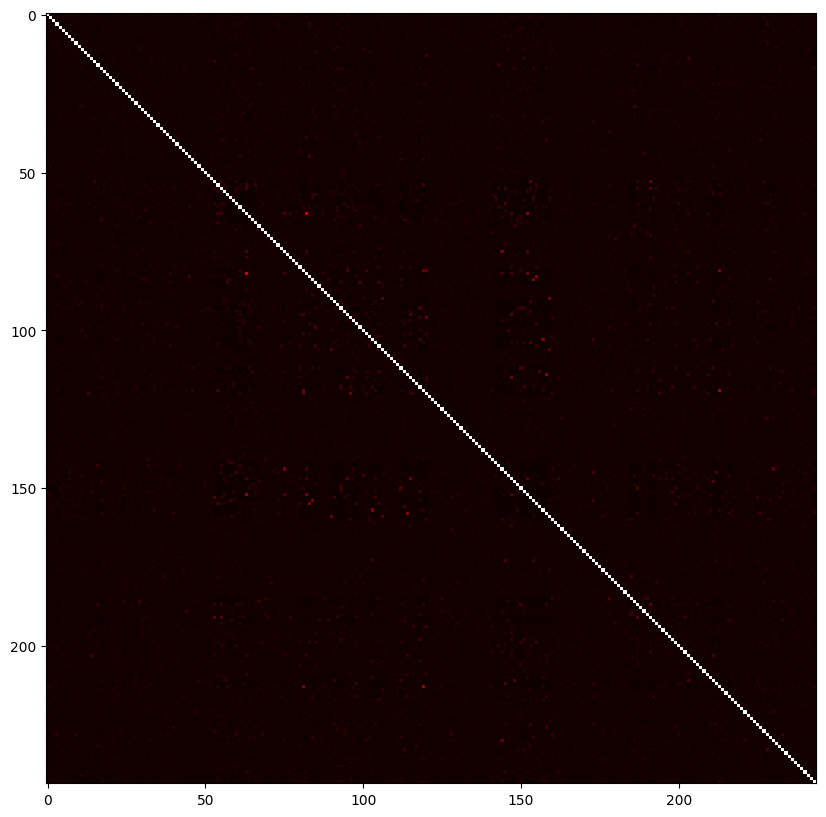

In [22]:
pcorr_vis("caida", "raw.csv", -5, flow_tuple, trunc_ratio, flowsize_filter)

Loading data from:
	data/caida/syn.csv
Number of packets: 995152
Trace duration: 2.342869 seconds
Loading data from:
	data/caida/syn.csv
Number of packets: 995152
Trace duration: 2.342869 seconds
Truncated data to 100.0% of original size, total duration: 2.342869
flow_tuple: ['srcip', 'srcport', 'dstip', 'dstport', 'proto']
109
Time unit=1.00e-05 with 234286 time intervals and 109 flows
(234286, 109)
109/109


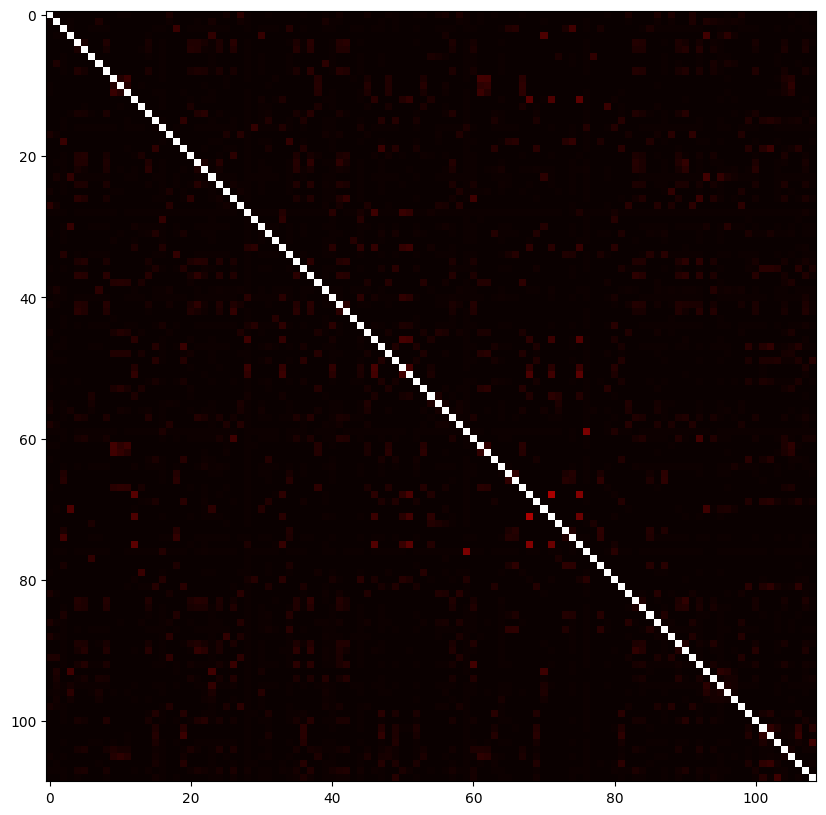

In [23]:
pcorr_vis("caida", "syn.csv", -5, flow_tuple, trunc_ratio, flowsize_filter)